<a href="https://colab.research.google.com/github/didi-a-p/BootcampDataScienceAlura/blob/main/Analisando%20dados%20da%20sa%C3%BAde%20com%20Python%20e%20Pandas/Aulas%20em%20notebooks%20separados/Aula_5_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
pd.options.display.float_format = "{:.2f}".format

In [ ]:
url = "https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv"

In [ ]:
dados = pd.read_csv(url, sep=";", skiprows=3, skipfooter=12, encoding="ISO-8859-1",engine='python',thousands='.', decimal=',')

In [ ]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")


In [ ]:
usaveis = dados[colunas_usaveis]


In [ ]:
usaveis = usaveis.set_index("Unidade da Federação")


In [ ]:
ordenado_por_total = usaveis.sort_values("Total", ascending= False)

In [ ]:
ordenado_col_interessadas = ordenado_por_total[ordenado_por_total.columns[6:-1]]


# Explorando

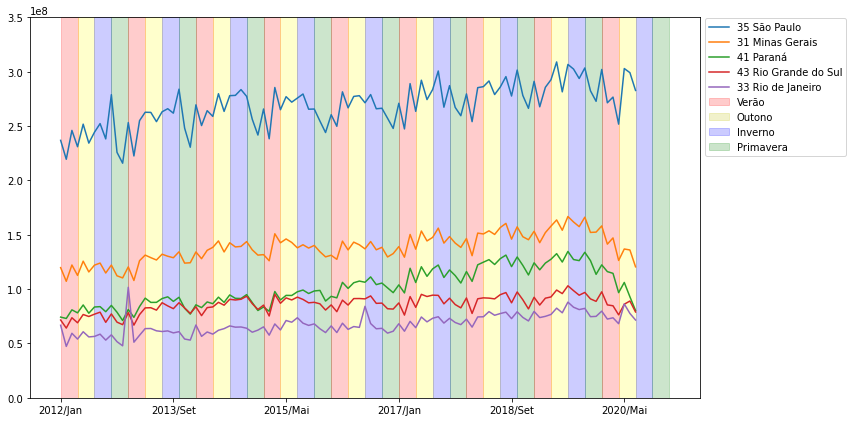

In [ ]:
ordenado_por_total[ordenado_por_total.columns[53: -1]].head().T.plot(figsize=(12,7))
plt.ylim(0,350000000)
for month in range(0, 105, 12):
    plt.axvspan(month, month+3, color='red', alpha=0.2) # Jan, Fev e Mar
    plt.axvspan(month+3, month+6, color='yellow', alpha=0.2) # Abr, Mai e Jun
    plt.axvspan(month+6, month+9, color='blue', alpha=0.2) # Jul, Ago e Set
    plt.axvspan(month+9, month+12, color='green', alpha=0.2) # Out, Nov e Dez

plt.title('Levando em consideração as Estações do ano')
plt.axvspan(0,0,0,0, color='r', alpha=0.2, label='Verão') 
plt.axvspan(0,0,0,0, color='y', alpha=0.2, label='Outono') 
plt.axvspan(0,0,0,0, color='b', alpha=0.2, label='Inverno') 
plt.axvspan(0,0,0,0, color='g', alpha=0.2, label='Primavera') 
plt.legend(bbox_to_anchor=(1, 1.01))

Com a demarcação das estações do ano, podemos perceber alguns padrões.
* São Paulo possui picos na transição do Inverno para a Primavera entre 2012 e 2014, e tem recorrente queda durante a primavera.
* Minas Gerais tém tendências de crescimento durante o Verão
* O Paraná tem tendência de queda durante a Primavera
* No Rio de Janeiro há uma tendência de crescimento entre o Verão e o Outono

In [ ]:
mes_mais_recente = ordenado_por_total.columns[-2]
mes_mais_recente

'2020/Jul'

In [ ]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente

Unidade da Federação
35 São Paulo             282709570.31
31 Minas Gerais          120467187.34
41 Paraná                 80320852.69
43 Rio Grande do Sul      78929703.81
33 Rio de Janeiro         71540227.33
29 Bahia                  58898100.40
26 Pernambuco             62325444.34
42 Santa Catarina         51764534.76
23 Ceará                  30809221.22
52 Goiás                  33499284.38
15 Pará                   27618727.51
21 Maranhão               24374205.15
32 Espírito Santo         27460475.47
24 Rio Grande do Norte    19593057.45
25 Paraíba                15491469.06
53 Distrito Federal       22233542.26
50 Mato Grosso do Sul     12508717.35
22 Piauí                  18019214.49
27 Alagoas                13087850.40
51 Mato Grosso            13083151.70
13 Amazonas               13358514.02
28 Sergipe                 3312766.32
17 Tocantins               4489665.87
11 Rondônia                7407388.24
12 Acre                    1163813.08
14 Roraima                 27

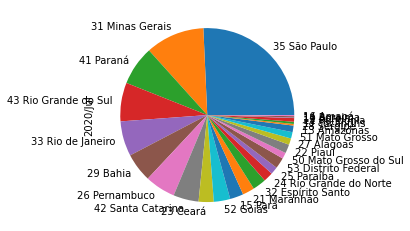

In [ ]:
gastos_do_mais_recente.plot(kind='pie')

O gráfico de Pizza (ou torta) não é o mais indicado para comparações entre muitos valores, pois dificulta a comparação de grandeza. Não é possível saber qual é o maior valor, nem o quão maior um valor é em relação ao outro

In [ ]:
total_mais_recente = gastos_do_mais_recente.values.sum()

In [ ]:
for v in range(len(gastos_do_mais_recente)):
  print(gastos_do_mais_recente.index[v] + ' - ' + str((gastos_do_mais_recente.values[v]/total_mais_recente)*100) + "%")

35 São Paulo - 25.715802335924277%
31 Minas Gerais - 10.95792538683159%
41 Paraná - 7.306138129544143%
43 Rio Grande do Sul - 7.179596571086484%
33 Rio de Janeiro - 6.507435680610539%
29 Bahia - 5.357483675515486%
26 Pernambuco - 5.669241424648716%
42 Santa Catarina - 4.708600923695562%
23 Ceará - 2.8024655909190463%
52 Goiás - 3.047158872500766%
15 Pará - 2.5122521909609072%
21 Maranhão - 2.2171242418336212%
32 Espírito Santo - 2.497857283227736%
24 Rio Grande do Norte - 1.7822219176666703%
25 Paraíba - 1.409133605923617%
53 Distrito Federal - 2.0224054578648802%
50 Mato Grosso do Sul - 1.1378168149589818%
22 Piauí - 1.6390621568465238%
27 Alagoas - 1.1904958630140952%
51 Mato Grosso - 1.1900684602901501%
13 Amazonas - 1.2151159427086506%
28 Sergipe - 0.3013355500374934%
17 Tocantins - 0.40838858033940995%
11 Rondônia - 0.6737901783672023%
12 Acre - 0.10586266000272224%
14 Roraima - 0.24919000631598692%
16 Amapá - 0.1960304983647639%


Mostrando as porcentagens dos gastos por UF

In [ ]:
gastos_do_mais_recente/gastos_do_mais_recente['33 Rio de Janeiro']

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
29 Bahia                 0.82
26 Pernambuco            0.87
42 Santa Catarina        0.72
23 Ceará                 0.43
52 Goiás                 0.47
15 Pará                  0.39
21 Maranhão              0.34
32 Espírito Santo        0.38
24 Rio Grande do Norte   0.27
25 Paraíba               0.22
53 Distrito Federal      0.31
50 Mato Grosso do Sul    0.17
22 Piauí                 0.25
27 Alagoas               0.18
51 Mato Grosso           0.18
13 Amazonas              0.19
28 Sergipe               0.05
17 Tocantins             0.06
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.04
16 Amapá                 0.03
Name: 2020/Jul, dtype: float64

Gastos em relação ao Rio de Janeiro

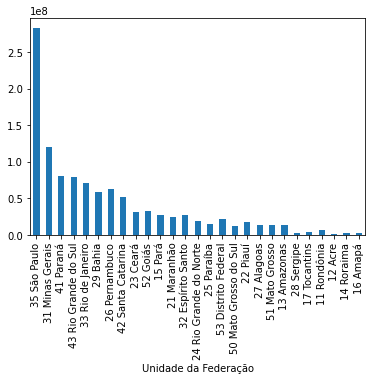

In [ ]:
gastos_do_mais_recente.plot(kind='bar')

O gráfico de barras é mais indicado para comparação de muitos valores.

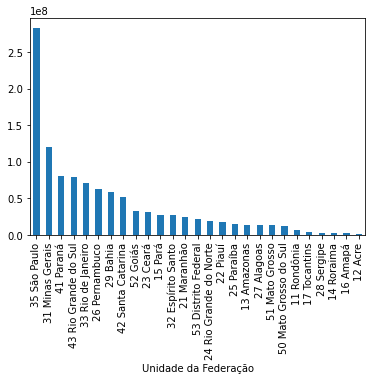

In [ ]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.plot(kind='bar')

É possivel até mesmo organizar os valorem em ordem crescente ou decrescente, o que é mais difícil e menos didátoco no gráfico de Pizza.